In [5]:
import pandas as pd
import matplotlib
from pandas import DataFrame
import json
import tweepy as tw


API_KEY = "qU3xA0HXN6G0l6rZlsTI9G2Ba"
API_SECRET_KEY = "KZsAAMWuZrfULqcq5OePEMig0v7RzdFIqd9I3ieMwqnOMRqXDw"


auth = tw.OAuthHandler(API_KEY, API_SECRET_KEY)

api = tw.API(auth, wait_on_rate_limit=True)


count = 50

search_query = "#INDvsAUSTest -filter:retweets"


result = tw.Cursor(api.search,
                   q=search_query,
                   since="2000-01-01").items(count)

print("bond")
tweets_copy = []
tweets_df = pd.DataFrame()
for tweet in result:
    hashtags = []
    

    
    try:
        for hashtag in tweet.entities["hashtags"]:
            hashtags.append(hashtag["text"])
        text = api.get_status(id=tweet.id, tweet_mode='extended').full_text
    except:
        pass
    tweets_df = tweets_df.append(pd.DataFrame({'user_name': tweet.user.name,
                                               'user_location': tweet.user.location,
                                               'user_description': tweet.user.description,
                                               'user_verified': tweet.user.verified,
                                               'date': tweet.created_at,
                                               'text': text,
                                               'retweet_count': tweet.retweet_count, 
                                            
                                               'len': len(text),
                                               'lang': tweet.lang,
                                               'hashtags': [hashtags if hashtags else None],
                                               'source': tweet.source}))
    tweets_df = tweets_df.reset_index(drop=True)

# show the dataframe
print("done")

tweets_df

print("Total Tweets fetched:", count)

bond
done
Total Tweets fetched: 50


In [6]:
tweets_df

,user_name,user_location,user_description,user_verified,date,text,retweet_count,len,lang,hashtags,source
0,Sankalp Kulkarni,,DOCTOR,False,2020-12-19 17:31:25,True that 🙌 #INDvsAUSTest #INDvsAUS #indvsaus2...,0,73,en,"[INDvsAUSTest, INDvsAUS, indvsaus2020]",Twitter Web App
1,Da_Lying_Lama🇮🇳,Kalyug,UnApologetically Indian and Proud Sanatani. Re...,False,2020-12-19 17:31:20,942040840 this is not my number but score of f...,0,118,en,"[INDvsAUSTest, IndiavsAustralia, INDvsAUS]",Twitter for iPhone
2,Saicha 😎,"Bengaluru, India",,False,2020-12-19 17:30:48,Indian Cricket Team’s 36-9 .. Barcelona’s 7th ...,0,176,en,None,Twitter for iPhone
3,Habibullah Mughal Official,"Talagang, Pakistan",,False,2020-12-19 17:30:46,کل ہمارے 35 پر 5 تھے تو بھارتی جشن منارہے تھے ...,0,156,ur,"[IndiavsAustralia, INDvsAUSTest]",Twitter for Android
4,TTushar,,Akshay kumar | Rahul Dravid | Gautam Gambhir |...,False,2020-12-19 17:30:45,"Choose the best wicket keeper among Gilchrist,...",0,102,tl,"[AUSvIND, INDvsAUSTest]",Twitter Web App
5,Bhavin Trivedi,Mumbai,"i can walk, i can talk, i can move, i can laug...",False,2020-12-19 17:30:38,@ComradeAlii @ImZaheer Bro Natrajan matlab sir...,0,303,hi,None,Twitter for iPhone
6,An Indian 🇮🇳,Mahabharat 🇮🇳,"#JaiJawan, #JaiKisan, #JaiHind.",False,2020-12-19 17:30:11,Indian cricket team has not only messed up the...,0,197,en,None,Twitter for Android
7,GK space,"Hyderabad, India",Dhoni,False,2020-12-19 17:30:04,#INDvsAUSTest \n👍👑😆😂,0,19,und,[INDvsAUSTest],Twitter for Android
8,Anurag Singh,"Gorakhpur, India",A human.being.,False,2020-12-19 17:30:02,Still can't get over that collapse this mornin...,0,269,en,None,Twitter for Android
9,dvk Virat Kohli,India,"@imVkohli \nye sirf Naam nahi, Duniya h hmari💘💘💘",False,2020-12-19 17:29:59,Adelaide is all about giving the best and faci...,0,112,en,"[viratkholi, INDvsAUSTest]",Twitter for iPhone


<AxesSubplot:>

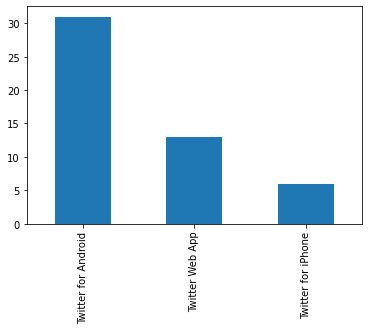

In [7]:
pd.value_counts(tweets_df['source']).plot.bar()

<AxesSubplot:>

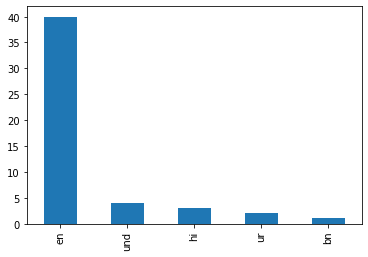

In [8]:
pd.value_counts(tweets_df['lang']).plot.bar()

<AxesSubplot:ylabel='user_verified'>

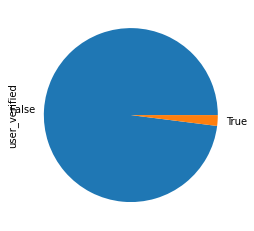

In [10]:
pd.value_counts(tweets_df['user_verified']).plot.pie()

<AxesSubplot:ylabel='Density'>

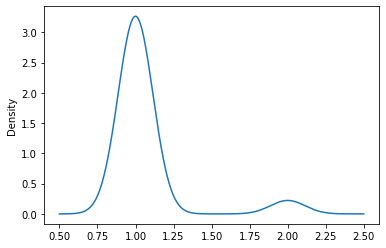

In [11]:
pd.value_counts(tweets_df['date']).plot.density()